# How to get your Roboflow key
Make sure you have an account on Roboflow then proceed to your [workspace](https://app.roboflow.com/). If you don't have a workspace, make sure to create one.

Under the workspace name you will find Roboflow API. Click on it and grab your private
key then define `api_key` in cell below.

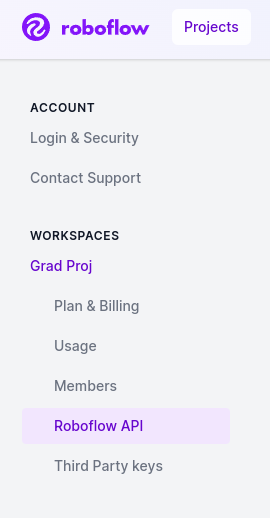

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="your roboflow key")
project = rf.workspace("roboflow-gw7yv").project("self-driving-car")
dataset = project.version(3).download("mt-yolov6")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 26.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled opencv-python-headless-4.8.0.76
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully un

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Car-3 in mt-yolov6:: 100%|██████████| 59607/59607 [00:07<00:00, 7984.88it/s] 


This part replaces the defined directory of Roboflow with a working Kaggle path in data.yaml for the training.
If you are using a different dataset, then you will want to change the command below to suit your needs.

In [2]:
!sed -i -e 's/Self/\/\kaggle\/working\/Self/g' /kaggle/working/Self-Driving-Car-3/data.yaml

In [3]:
!git clone https://github.com/meituan/YOLOv6
!git clone -b yolo-training https://github.com/Bumbleboss/autonomous-vehicle/

Cloning into 'YOLOv6'...
remote: Enumerating objects: 3785, done.
remote: Counting objects: 100% (1665/1665), done.
remote: Compressing objects: 100% (292/292), done.
remote: Total 3785 (delta 1472), reused 1375 (delta 1373), pack-reused 2120
Receiving objects: 100% (3785/3785), 47.11 MiB | 31.42 MiB/s, done.
Resolving deltas: 100% (2304/2304), done.
Cloning into 'autonomous-vehicle'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 80 (delta 23), reused 58 (delta 12), pack-reused 0
Receiving objects: 100% (80/80), 58.61 KiB | 5.33 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
!python autonomous-vehicle/YOLOv6/autosplit.py

Directory does not exist, creating directory: Self-Driving-Car-3/images/train
Directory does not exist, creating directory: Self-Driving-Car-3/images/valid
Directory does not exist, creating directory: Self-Driving-Car-3/images/test
Directory does not exist, creating directory: Self-Driving-Car-3/labels/train
Directory does not exist, creating directory: Self-Driving-Car-3/labels/valid
Directory does not exist, creating directory: Self-Driving-Car-3/labels/test
Used 29800 out of 29800 images


In [ ]:
%cd YOLOv6
!pip install -r requirements.txt

Make sure you have an accelerator enabled for the session before actually running the command.

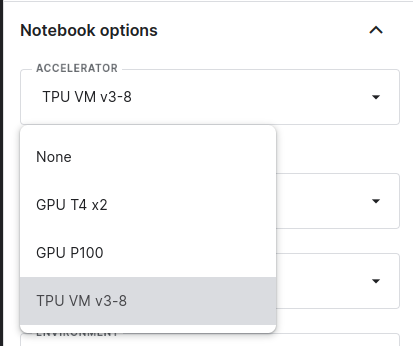

In [ ]:
!python tools/train.py --batch 32 --conf configs/yolov6n.py --epochs 70 --img-size 416 --data /kaggle/working/Self-Driving-Car-3/data.yaml --device 0